In [ ]:
# po co batch: nie wprowdzamy calych danych ale w paczkach. Po to, aby ona na bieżąco aktualizowała wagi w sieci = szybciej się uczy
# standardowy batch size to 32. On jest domyślny. Naraz do sieci wprowadzane są 32 wiersze.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
EPOCHS = 100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Przygotowanie danych
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
#ile czasu zajmuje jeden krok dla poszczególnych wartości batch size?
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_images, test_labels))
    histories.append(history)

Ustawiona wielość zbioru: 8
Epoch 1/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2109 - accuracy: 0.9379 - val_loss: 0.1187 - val_accuracy: 0.9622
Epoch 2/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0956 - accuracy: 0.9700 - val_loss: 0.0910 - val_accuracy: 0.9710
Epoch 3/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.1015 - val_accuracy: 0.9717
Epoch 4/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 5/5
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.1023 - val_accuracy: 0.9715
Ustawiona wielość zbioru: 16
Epoch 1/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2299 - accuracy: 0.9326 - val_loss: 0.1212 - val_accuracy: 0.9625
Epoch 2/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.100

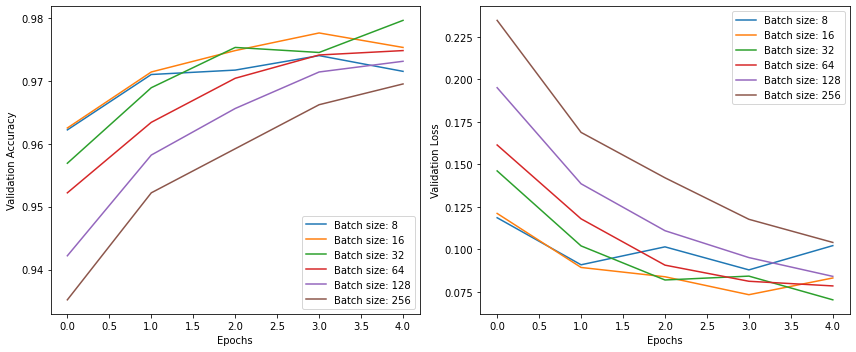

In [4]:
# Wygenerowanie wykresów
plt.figure(figsize=(12, 5))

# Dokładność
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Strata
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# im mniejszy jest batch size tym więcej czasu zajmuje aktualizowanie wag (czemu -> bo częśćiej trzeba je aktyualizować i obliczać)
# 60000(liczba elementów w mnist) / np7500 = wielkość batch size 8 (dla innych bs są inne te liczby jak coś)
# wydawałoby się że najlepszy będzie więc największy bs skoro tak szybko liczy - nie: na wykresie widzimy że bs 256 jest najgorsze pod względem accuracy i funkcją straty. bo nie zdąża aktualizować wag

In [7]:
# wiemy więć że powinniśmy usunąć np 64,128, 256 ze względu na wyniki. Dopiero wtedy więc wtedy decydujemy się na kryterium czasu - patrzymy który najszybciej policzył